In [99]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.integrate as integrate

## Part 1

In [100]:
def riemannSum(f, a, b, n):
    vals = np.array([])
    del_x = (b-a)/n
    x = np.arange(a,b,del_x)
    for i in range(len(x)):
        vals = np.append(vals, f(x[i])*del_x)
    return np.sum(vals)

In [101]:
# finite difference method, not sure if the problem was implying to use this
def derivEst(f, a, b, n):
    vals = np.array([])
    del_x = (b-a)/n
    x = np.arange(a,b,del_x)
    for i in range(len(x)):
        vals = np.append(vals, (f(x[i]+del_x)-f(x[i]))/(del_x))
    return x, vals

For each part I print the result of the Riemann sum and a numerical integrator from scipy as well as the derivative estimator plotted against both the starting function and the real solution. 

Testing Riemman Sum
(1.8390715290764525, 9.921183292055902e-12)
1.841776309009281
Testing Numerical differentiator


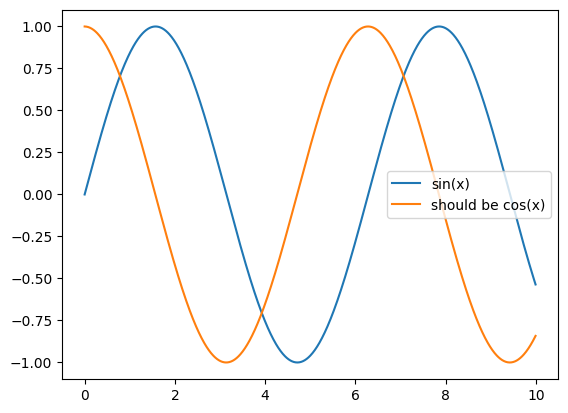

In [102]:
# part 1a

f = lambda x : np.sin(x)
a = 0
b = 10
n = 1000
ans = riemannSum(f, a, b, n)
print("Testing Riemman Sum")
print(integrate.quad(f, a, b))   # Using SciPy to check correctness
print(ans)
print("Testing Numerical differentiator")
x, ans = derivEst(f, a, b, n)
plt.plot(x, f(x), label = "sin(x)")
plt.plot(x, ans, label = "should be cos(x)")
plt.legend()
# seems to look like cos(x) thankfully

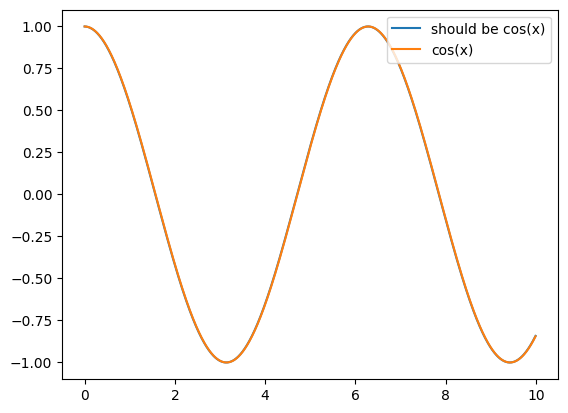

In [103]:
plt.plot(x, ans, label = "should be cos(x)")
plt.plot(x, np.cos(x), label = "cos(x)")
plt.legend()

Testing Riemman Sum
(333.33333333333326, 3.700743415417188e-12)
332.8335
Testing Numerical differentiator


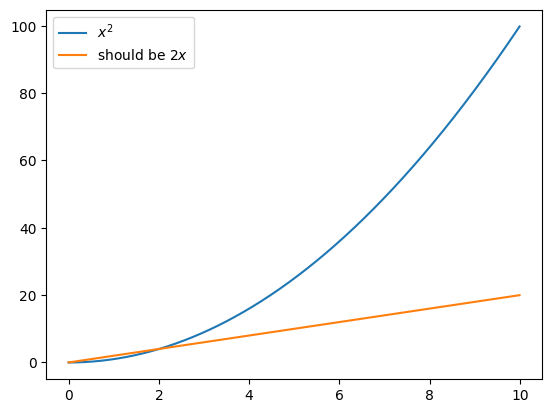

In [104]:
# part 1b

f = lambda x : x**2
a = 0
b = 10
n = 1000
ans = riemannSum(f, a, b, n)
print("Testing Riemman Sum")
print(integrate.quad(f, a, b))   # Using SciPy to check correctness
print(ans)
print("Testing Numerical differentiator")
x, ans = derivEst(f, a, b, n)
plt.plot(x, f(x), label = "$x^2$")
plt.plot(x, ans, label = "should be $2x$")
plt.legend()

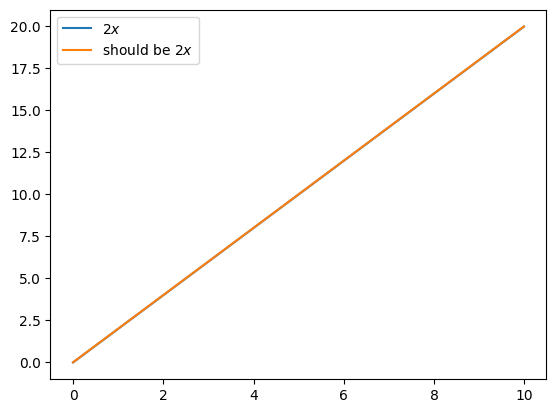

In [105]:
plt.plot(x, 2*x, label = "$2x$")
plt.plot(x, ans, label = "should be $2x$")
plt.legend()

Testing Riemman Sum
(0.3333333333333021, 1.2410460316749153e-10)
0.33835833295830964
Testing Numerical differentiator


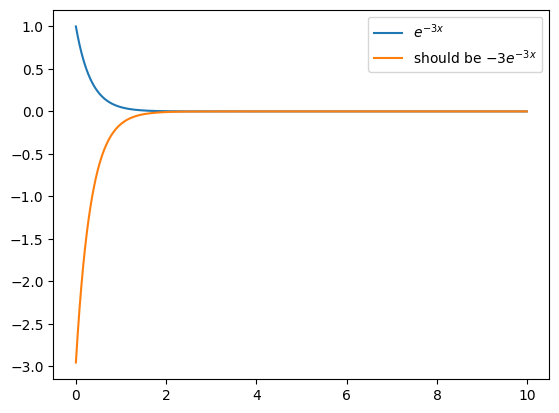

In [106]:
# part 1c

f = lambda x : np.exp(-3*x)
a = 0
b = 10
n = 1000
ans = riemannSum(f, a, b, n)
print("Testing Riemman Sum")
print(integrate.quad(f, a, b))   # Using SciPy to check correctness
print(ans)
print("Testing Numerical differentiator")
x, ans = derivEst(f, a, b, n)
plt.plot(x, f(x), label = "$e^{-3x}$")
plt.plot(x, ans, label = "should be $-3e^{-3x}$")
plt.legend()

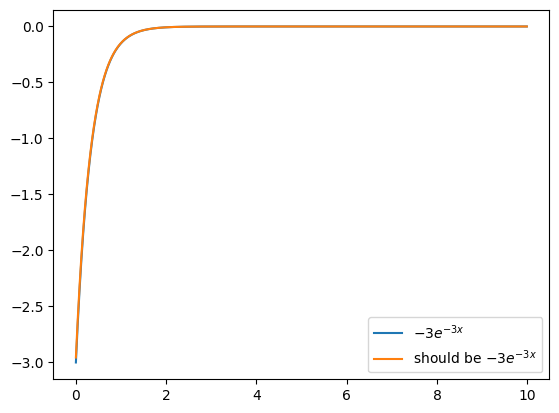

In [107]:
plt.plot(x, -3*np.exp(-3*x), label = "$-3e^{-3x}$")
plt.plot(x, ans, label = "should be $-3e^{-3x}$")
plt.legend()

## Part 2

As we know the Taylor Series is:
\begin{equation}
    f(a) + f'(a)(x-a) + \frac{f"(a)}{2!}(x-a)^2 + \frac{f^{(3)}(a)}{3!}(x-a)^3 + ...
\end{equation}

For $sin(x)$ we can easily find its derivatives:<br>

\begin{equation}
    f'(x) = cos(x)
\end{equation}

\begin{equation}
    f"(x) = -sin(x)
\end{equation}

\begin{equation}
    f^{(3)}(x) = -cos(x)
\end{equation}

Knowing this information, we can plug these into the Taylor series
\begin{equation}
    sin(0) + cos(0)x + \frac{-sin(0)}{2!}x^2 - \frac{cos(0)}{3!}x^3 + ...
\end{equation}

Since $sin(0) = 0$ This can be simplified very easily:
\begin{equation}
    sin(x) \approx x - \frac{1}{6}x^3 + ...
\end{equation}

Since there is not a lot of terms in this I will go up a few orders:
\begin{equation}
    sin(x) \approx x - \frac{1}{6}x^3 + \frac{1}{120}x^5 - \frac{1}{5040}x^7
\end{equation}

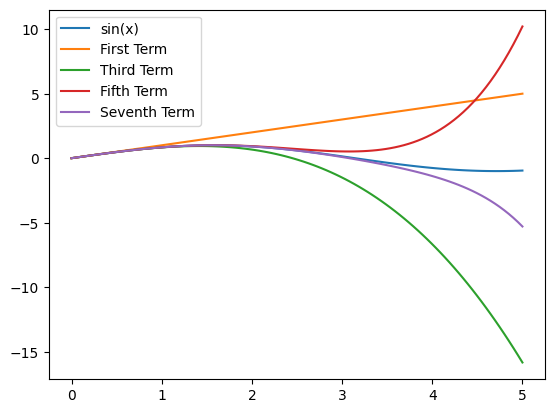

In [108]:
x = np.linspace(0, 5, 100)
plt.plot(x, np.sin(x), label = "sin(x)")
plt.plot(x, x, label = "First Term")
plt.plot(x, x - (1/6)*(x**3), label = "Third Term")
plt.plot(x, x - (1/6)*(x**3) + (1/120)*(x**5), label = "Fifth Term")
plt.plot(x, x - (1/6)*(x**3) + (1/120)*(x**5) - (1/5040)*(x**7), label = "Seventh Term")
plt.legend()

$sin(x) = x$ (the first term of the Taylor series) is also the small angle approximation. The plot above shows that as x (or the angle) increases, the less accurate the approximation is.

For $x^2$ we can list its derivatives as follows:
\begin{equation}
    f'(x) = 2x
\end{equation}

\begin{equation}
    f"(x) = 2
\end{equation}

When we plug this in:
\begin{equation}
    x^2 \approx 0^2 + \frac{2*0}{1}x + \frac{2}{2}x^2 ...
\end{equation}

So our solution is:
\begin{equation}
    x^2 \approx x^2
\end{equation}

Kind of underwhelming...

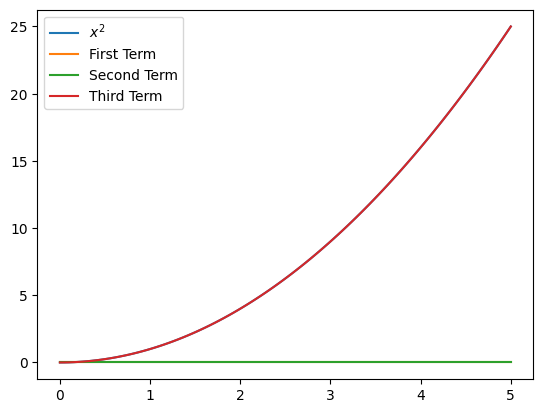

In [109]:
plt.plot(x, x**2, label="$x^2$")
plt.plot(x, 0*x, label = "First Term")
plt.plot(x, 0*x, label = "Second Term")
plt.plot(x, x**2, label="Third Term")
plt.legend()

For $e^{-3x}$ we can list its derivatives as follows:
\begin{equation}
    f'(x) = -3e^{-3x}
\end{equation}

\begin{equation}
    f'(x) = 9e^{-3x}
\end{equation}

\begin{equation}
    f'(x) = -27e^{-3x}
\end{equation}

When we plug this in...
\begin{equation}
    e^{-3x} \approx e^{0} + \frac{-3 e^{0}}{1}x + \frac{9 e^{0}}{2!}x^2 + \frac{-27 e^{0}}{3!}x^3
\end{equation}

$e^{0} = 1$ So we can simplify this further:

\begin{equation}
    e^{-3x} \approx 1 - 3x + \frac{9}{2}x^2 - \frac{27}{6}x^3
\end{equation}

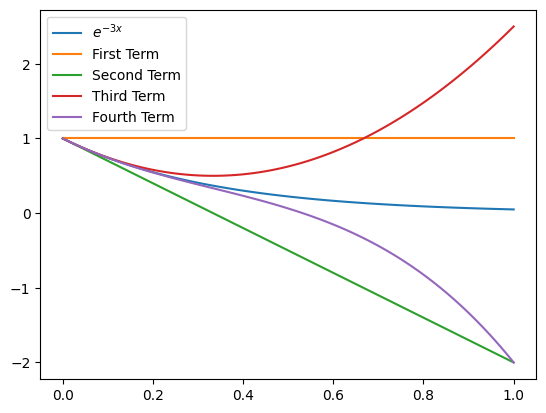

In [110]:
x = np.linspace(0, 1, 100)
plt.plot(x, np.exp(-3*x), label="$e^{-3x}$")
plt.plot(x, np.ones(len(x)), label = "First Term")
plt.plot(x, 1 - 3*x, label = "Second Term")
plt.plot(x, 1 - 3*x + (9/2)*(x**2), label="Third Term")
plt.plot(x, 1 - 3*x + (9/2)*(x**2) - (27/6)*(x**3), label="Fourth Term")
plt.legend()